In [ ]:
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('final_dataset.csv')
#df = pd.read_csv('/content/drive/MyDrive/DBA3803/Dataset/final_dataset.csv')

In [ ]:
print(df.shape)
df.head()

(995343, 38)


,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,keep_alive_session,device_distinct_emails_8w,month,intended_balcon_missing,bank_months_missing,velocity_6h_missing,income_age_ratio,income_credit_risk_ratio,credit_risk_age_ratio,income_group
0,0,0.3,0.986506,0,25.0,40,0.006735,102.453711,AA,1059,...,1,1.0,0,0,0,0,0.0075,0.001840,4.075,low
1,0,0.8,0.617426,0,89.0,20,0.010095,32.433701,AD,1658,...,1,1.0,0,1,0,0,0.0400,0.005195,7.700,high
2,0,0.8,0.996707,9,14.0,40,0.012316,32.433701,AB,1095,...,0,1.0,0,1,0,0,0.0200,0.008989,2.225,high
3,0,0.6,0.475100,11,14.0,30,0.006991,32.433701,AB,3483,...,1,1.0,0,1,0,0,0.0200,0.006667,3.000,high
4,0,0.9,0.842307,0,29.0,40,5.742626,47.152498,AA,2339,...,0,1.0,0,0,0,0,0.0225,0.009890,2.275,high


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995343 entries, 0 to 995342
Data columns (total 38 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   fraud_bool                        995343 non-null  int64  
 1   income                            995343 non-null  float64
 2   name_email_similarity             995343 non-null  float64
 3   prev_address_months_count         995343 non-null  int64  
 4   current_address_months_count      995343 non-null  float64
 5   customer_age                      995343 non-null  int64  
 6   days_since_request                995343 non-null  float64
 7   intended_balcon_amount            995343 non-null  float64
 8   payment_type                      995343 non-null  object 
 9   zip_count_4w                      995343 non-null  int64  
 10  velocity_6h                       995343 non-null  float64
 11  velocity_24h                      995343 non-null  f

# EDA

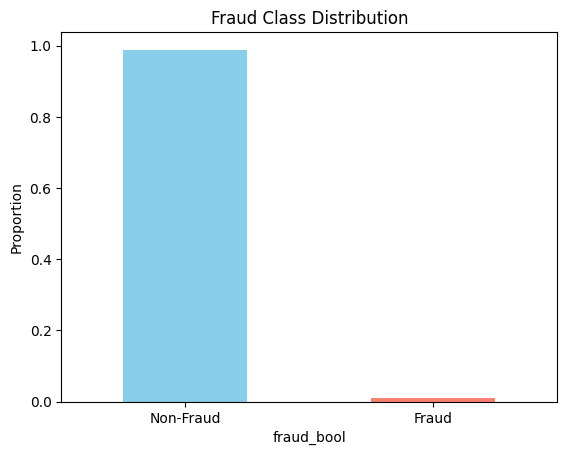

In [ ]:
# Class distribution
df['fraud_bool'].value_counts(normalize=True).plot(kind='bar', title='Fraud Class Distribution', color=['skyblue', 'salmon'])
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'], rotation=0)
plt.ylabel('Proportion')
plt.show()

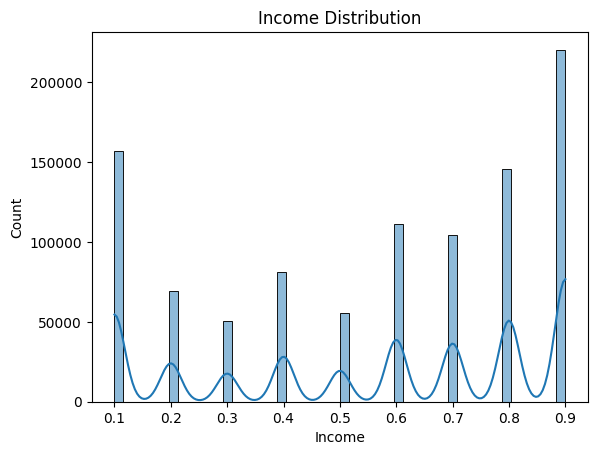

In [ ]:
# Income distribution
sns.histplot(df['income'], kde=True, bins=50)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.show()

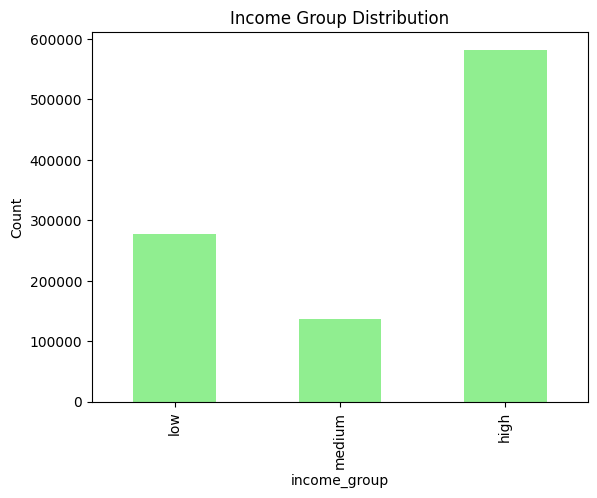

In [ ]:
# Income group distribution
df['income_group'] = pd.cut(df['income'], bins=[0, 0.3, 0.6, 0.9], labels=['low', 'medium', 'high'])
df['income_group'].value_counts().sort_index().plot(kind='bar', title='Income Group Distribution', color='lightgreen')
plt.ylabel('Count')
plt.show()

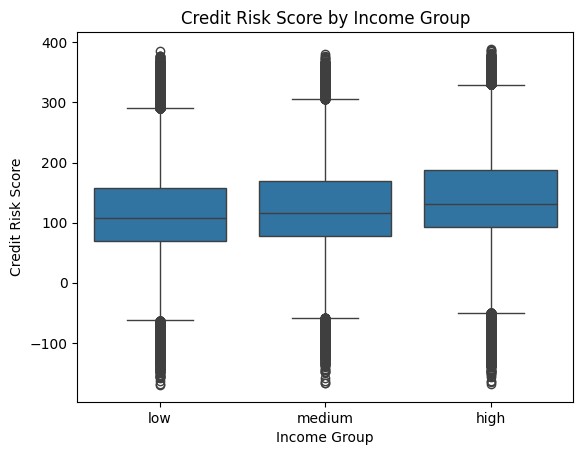

In [ ]:
# Credit risk by income group
sns.boxplot(x='income_group', y='credit_risk_score', data=df)
plt.title('Credit Risk Score by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Credit Risk Score')
plt.show()

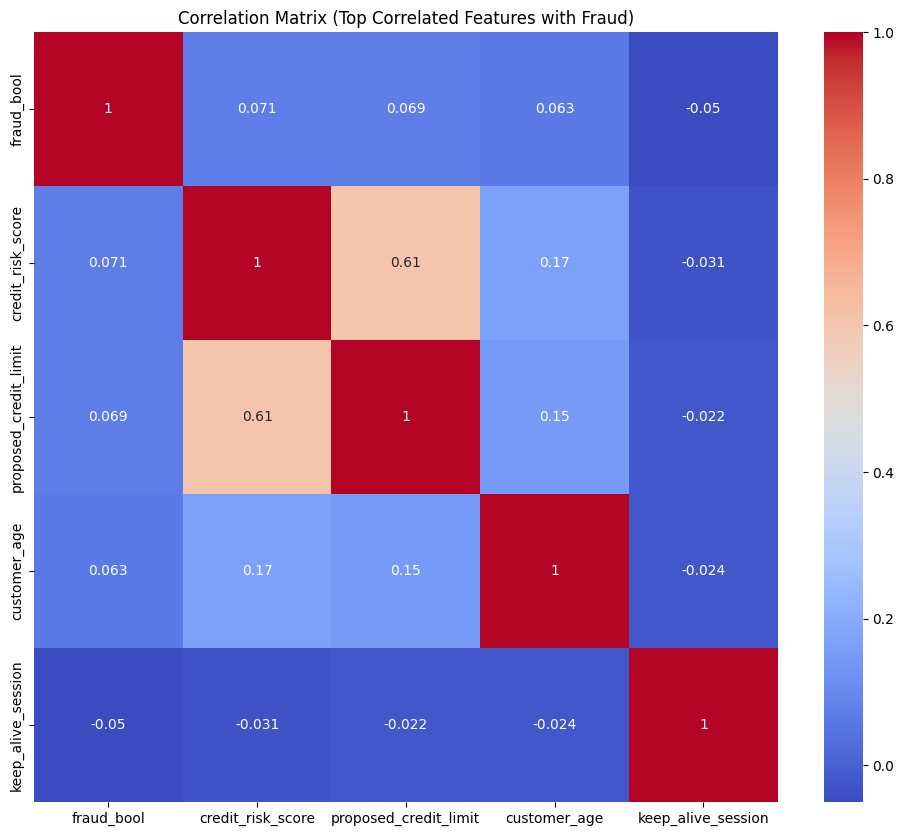

In [ ]:
# Filter to numeric columns only
numeric_df = df.select_dtypes(include='number')

# Calculate correlation with fraud label
target_corr = numeric_df.corr()['fraud_bool'].sort_values(ascending=False)

# Visualize only variables with noticeable correlation
plt.figure(figsize=(12, 10))
sns.heatmap(
    numeric_df[target_corr[abs(target_corr) > 0.05].index].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation Matrix (Top Correlated Features with Fraud)")
plt.show()